In [1]:
#%pip install pyodbc  
#%pip install python-dotenv

#install openpyxl to overcome Import error of .xlsx file(Telco-churn-second-2000.xlsx)
#%pip install openpyxl

In [1]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


# Data for the Project
First dataset - First 3000 records of the dataset was extracted from Microsoft SQL Server
Second dataset - The second 2000 records of the dataset was downloaded from OneDrive
Third dataset - The third part of the data was downloaded from a GitHub Repository


In [2]:
environment_variables=dotenv_values('.env')

database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
connection=pyodbc.connect(connection_string)

In [4]:
# extract first 3000 and name data1
# preview dataset with .head()

query="Select * from dbo.LP2_Telco_churn_first_3000"
data1=pd.read_sql(query, connection)

data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [5]:
# Save extracted data as data1.csv

data1.to_csv('data1.csv')

In [6]:
#import second dataset and name as data2
#store as data2.csv
#preview dataset with .head()

data2 = pd.read_csv(r"C:\Users\lenovo\Desktop\Seth\Personal\Azubi\Career Accelarator prog\LP2\LP2_Telco-churn-last-2000.csv")
data2.to_csv('data2.csv')

#get information on data2

data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


## Data Preprocessing
* In the data preprocessing phase, we check the columns, shape, and information on the data to understand its dimensions. 
* We then check for null values in the dataset and impute or remove them depending on the circumstances
* Also we perform a check for duplicaate values and replace them to ensure data integrity


In [7]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#get information on first dataset - Non-null, datatype

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [41]:
# Checking the null values in the dataset
# percentage of missing values in data1

data1.isna().sum()/len(data1)*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.166667
Churn                0.033333
dtype: float64

In [11]:
#Checking the data shape
print(f'The first 3000 dataset contains {data1.shape[0]} rows and {data1.shape[1]} columns')

The first 3000 dataset contains 3000 rows and 21 columns


In [12]:
data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
#get information on next dataset - Non-null, datatype

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [42]:
# Checking the null values in the dataset
# percentage of missing values in data2

data2.isna().sum()/len(data1)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [15]:
#Checking the data shape
print(f'The next dataset contains {data2.shape[0]} rows and {data2.shape[1]} columns')

The next dataset contains 2043 rows and 21 columns


In [14]:
# Compare the two DataFrames data1 and data2 side-by-side
# The idea is to easily compare so we can clean dataset before we merge as a train dataset

# Create custom summary DataFrames for each DataFrame
summary_data1 = pd.DataFrame({'Column Name': data1.columns, 'Data Type': data1.dtypes, 'Non-Null Count': data1.count()})
summary_data2 = pd.DataFrame({'Column Name': data2.columns, 'Data Type': data2.dtypes, 'Non-Null Count': data2.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data1.set_index('Column Name', inplace=True)
summary_data2.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data1, summary_data2], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

From the above the following was observed:
* Both have the same column names
* There are different datatypes in some columns. For instance SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, and TotalCharges
* Data cleaning will be done side by side before merging. 
* We will refer from the readme instructions for proper datatype


## Clean columns
## customerID
Check and clean columns step by step

In [15]:
#Preview data1 'customerID column

data1['customerID'].head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

In [16]:
#Preview data2 'customerID column

data2['customerID'].head()

0    5600-PDUJF
1    8292-TYSPY
2    0567-XRHCU
3    1867-BDVFH
4    2067-QYTCF
Name: customerID, dtype: object

## gender


In [17]:
data1['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [18]:
data1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
data2['gender'].head()

0      Male
1      Male
2    Female
3      Male
4    Female
Name: gender, dtype: object

In [20]:
data2['gender'].unique()

array(['Male', 'Female'], dtype=object)

The 'gender' column for both data looks clean. 


## SeniorCitizen

From Data Understanding document:
* SeniorCitizen -- Whether a customer is a senior citizen or not

There are no missing data but the datatype is different. data1 is a boolean while data2 is made up of integers


In [21]:
data1['SeniorCitizen'].unique()

array([False,  True])

In [22]:
data2['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [23]:
# Convert the binary column to boolean datatype
data2['SeniorCitizen'] = data2['SeniorCitizen'].astype(bool)

In [24]:
data2['SeniorCitizen'].unique()

array([False,  True])

## Partner

Convert data2['Partner'] to boolean datatype to reflect Data understanding documentation

* Whether the customer has a partner or not (Yes, No)

In [25]:
data2['Partner'].head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Partner, dtype: object

In [26]:
data1['Partner'].head()

0     True
1    False
2    False
3    False
4    False
Name: Partner, dtype: bool

In [27]:
data2['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
#Replace 'Yes' or 'No' with True or False

data2['Partner'].replace('Yes', True, inplace=True)
data2['Partner'].replace('No', False, inplace=True)
data2['Partner'].head()

0    False
1    False
2     True
3     True
4     True
Name: Partner, dtype: bool

## Dependent 
Convert to reflect readme documentation on data understanding
* Dependents -- Whether the customer has dependents or not (Yes, No)

In [29]:
data1['Dependents'].head()

0    False
1    False
2    False
3    False
4    False
Name: Dependents, dtype: bool

In [30]:
data1['Dependents'].unique()

array([False,  True])

In [31]:
data2['Dependents'].head()

0     No
1     No
2    Yes
3    Yes
4     No
Name: Dependents, dtype: object

In [32]:
#Replace 'Yes' or 'No' with True or False

data2['Dependents'].replace('Yes', True, inplace=True)
data2['Dependents'].replace('No', False, inplace=True)
data2['Dependents'].head()

0    False
1    False
2     True
3     True
4    False
Name: Dependents, dtype: bool

## tenure



In [33]:
data1['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [34]:
data2['tenure'].unique()

array([ 6, 19, 69, 11, 64, 39, 15, 25, 66, 61, 43, 12, 23, 71, 34,  5, 41,
       72, 14,  1, 10,  7,  9, 48, 20, 16,  2, 22, 35, 54, 56, 18, 68, 53,
       30, 36, 55, 21, 33, 44,  4, 49, 42, 67, 40, 45, 57,  8, 65,  3, 17,
       28, 52, 47, 50, 46, 29, 27, 13, 24, 62, 26, 60, 51, 70, 59, 38, 37,
        0, 58, 31, 32, 63], dtype=int64)

In [36]:
data1['tenure'].isnull().sum()

0

In [37]:
data2['tenure'].isnull().sum()

0

## PhoneService

Convert to reflect readme documentation on data understanding

* Phone Service -- Whether the customer has a phone service or not (Yes, No)

In [38]:
data1['PhoneService'].head()

0    False
1     True
2     True
3    False
4     True
Name: PhoneService, dtype: bool

In [39]:
data2['PhoneService'].head()

0    Yes
1    Yes
2     No
3    Yes
4    Yes
Name: PhoneService, dtype: object

In [40]:
#Replace 'Yes' or 'No' with True or False

data2['PhoneService'].replace('Yes', True, inplace=True)
data2['PhoneService'].replace('No', False, inplace=True)
data2['PhoneService'].head()

0     True
1     True
2    False
3     True
4     True
Name: PhoneService, dtype: bool

## MultipleLines

data1 has some missing values about 8.9%
impute with mode

In [43]:
#confirm number of missing values

data1['MultipleLines'].isnull().sum()

269

In [44]:
data1['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [45]:
data1['MultipleLines'].value_counts()

MultipleLines
False    1437
True     1294
Name: count, dtype: int64

In [46]:
#impute missing values with mode
mode_multiplelines = data1['MultipleLines'].mode()[0]

data1['MultipleLines'].fillna(mode_multiplelines, inplace=True)
data1['MultipleLines'].isnull().sum()


0

In [47]:
data1['MultipleLines'].value_counts()

MultipleLines
False    1706
True     1294
Name: count, dtype: int64

In [48]:
data2['MultipleLines'].unique()

array(['No', 'No phone service', 'Yes'], dtype=object)

In [49]:
data2['MultipleLines'].head()

0                  No
1                  No
2    No phone service
3                 Yes
4                 Yes
Name: MultipleLines, dtype: object

In [50]:
data2['MultipleLines'].value_counts()

MultipleLines
No                  987
Yes                 836
No phone service    220
Name: count, dtype: int64

In [51]:
#we assume that an answer of 'No phone service' is the same as No, since a customer without phone service will have no need for multiplelines

# Replace 'No phone service' with 'No' in the 'MultipleLines' column
data2['MultipleLines'].replace('No phone service', 'No', inplace=True)
data2['MultipleLines'].value_counts()

MultipleLines
No     1207
Yes     836
Name: count, dtype: int64

In [52]:
#confirm number of missing values

data2['MultipleLines'].isnull().sum()

0

In [53]:
data2['MultipleLines'].value_counts()

MultipleLines
No     1207
Yes     836
Name: count, dtype: int64

In [54]:
data2['MultipleLines'].replace('Yes', True, inplace=True)
data2['MultipleLines'].replace('No', False, inplace=True)
data2['MultipleLines'].head()

0    False
1    False
2    False
3     True
4     True
Name: MultipleLines, dtype: bool

In [55]:
data2['MultipleLines'].value_counts()

MultipleLines
False    1207
True      836
Name: count, dtype: int64

In [56]:
data2['MultipleLines'].unique()

array([False,  True])

In [57]:
data1['MultipleLines'].unique()

array([False,  True])

## InternetService

In [58]:
data1['InternetService'].isnull().sum()

0

In [59]:
data1['InternetService'].nunique()

3

In [60]:
data1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [61]:
data2['InternetService'].nunique()

3

In [62]:
data1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

'InternetService' column is clean


## OnlineSecurity

* OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

In [63]:
data1['OnlineSecurity'].unique()

array([False, True, None], dtype=object)

In [64]:
data1['OnlineSecurity'].value_counts()

OnlineSecurity
False    1478
True      871
Name: count, dtype: int64

In [65]:
data1['OnlineSecurity'].isnull().sum()

651

In [66]:
# We assume the missing data is a response to the third option 'No Internet'. Hence will fill missing with 'No Internet'
# Impute missing values with 'No Internet'.


data1['OnlineSecurity'].fillna('No Internet', inplace=True)
data1['OnlineSecurity'].value_counts()

OnlineSecurity
False          1478
True            871
No Internet     651
Name: count, dtype: int64

In [67]:
data2['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [68]:
data2['OnlineSecurity'].value_counts()

OnlineSecurity
No                     1029
Yes                     585
No internet service     429
Name: count, dtype: int64

In [69]:
# Replace 'No internet service' with 'No Internet' in the 'MultipleLines' column
data2['OnlineSecurity'].replace('No internet service', 'No Internet', inplace=True)
data2['OnlineSecurity'].value_counts()

OnlineSecurity
No             1029
Yes             585
No Internet     429
Name: count, dtype: int64

## OnlineBackup

* OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

In [70]:
data1['OnlineBackup'].isnull().sum()

651

In [71]:
data1['OnlineBackup'].unique()

array([True, False, None], dtype=object)

In [72]:
data2['OnlineBackup'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [73]:
# Replace 'False' with 'No' and 'True' with 'Yes' the 'OnlineBackup' column
# Fill missing values with 'No Internet'

data1['OnlineBackup'].replace(True, 'Yes', inplace=True)
data1['OnlineBackup'].replace(False, 'No', inplace=True)

data1['OnlineBackup'].fillna('No Internet', inplace=True)
data1['OnlineBackup'].value_counts()


OnlineBackup
No             1320
Yes            1029
No Internet     651
Name: count, dtype: int64

In [74]:
# Replace 'No internet service' with 'No Internet'

data2['OnlineBackup'].replace('No internet service', 'No Internet', inplace=True)
data2['OnlineBackup'].unique()

array(['No', 'Yes', 'No Internet'], dtype=object)

## DeviceProtection

* DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

In [75]:
data1['DeviceProtection'].unique()

array([False, True, None], dtype=object)

In [76]:
data1['DeviceProtection'].isnull().sum()

651

In [77]:
# Replace 'False' with 'No' and 'True' with 'Yes' the 'OnlineBackup' column
# Fill missing values with 'No Internet'

data1['DeviceProtection'].replace(True, 'Yes', inplace=True)
data1['DeviceProtection'].replace(False, 'No', inplace=True)

data1['DeviceProtection'].fillna('No internet service', inplace=True)
data1['DeviceProtection'].value_counts()

DeviceProtection
No                     1296
Yes                    1053
No internet service     651
Name: count, dtype: int64

In [80]:
data2['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

## TechSupport

* TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

In [82]:
data1['TechSupport'].unique()

array([False, True, None], dtype=object)

In [83]:
data1['TechSupport'].replace(True, 'Yes', inplace=True)
data1['TechSupport'].replace(False, 'No', inplace=True)

data1['TechSupport'].fillna('No internet', inplace=True)
data1['TechSupport'].value_counts()

TechSupport
No             1476
Yes             873
No internet     651
Name: count, dtype: int64

In [84]:
data1['TechSupport'].isnull().sum()

0

In [85]:
data2['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [86]:
data2['TechSupport'].replace('No internet service', 'No internet', inplace=True)
data2['TechSupport'].unique()

array(['Yes', 'No', 'No internet'], dtype=object)

## StreamingTV

* StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

In [87]:
data1['StreamingTV'].unique()

array([False, True, None], dtype=object)

In [88]:
data1['StreamingTV'].replace(True, 'Yes', inplace=True)
data1['StreamingTV'].replace(False, 'No', inplace=True)

data1['StreamingTV'].fillna('No internet service', inplace=True)
data1['StreamingTV'].value_counts()

StreamingTV
No                     1190
Yes                    1159
No internet service     651
Name: count, dtype: int64

In [89]:
data2['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

## StreamingMovies

* StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

In [91]:
data1['StreamingMovies'].unique()

array([False, True, None], dtype=object)

In [92]:
data1['StreamingMovies'].replace(True, 'Yes', inplace=True)
data1['StreamingMovies'].replace(False, 'No', inplace=True)

data1['StreamingMovies'].fillna('No internet service', inplace=True)
data1['StreamingMovies'].value_counts()

StreamingMovies
Yes                    1199
No                     1150
No internet service     651
Name: count, dtype: int64

In [93]:
data2['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

## Contract


In [94]:
data1['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [95]:
data2['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

## PaperlessBilling

* PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

In [96]:
data1['PaperlessBilling'].unique()

array([ True, False])

In [97]:
data1['PaperlessBilling'].replace(True, 'Yes', inplace=True)
data1['PaperlessBilling'].replace(False, 'No', inplace=True)
data1['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [98]:
data2['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

## PaymentMethod



In [99]:
data1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [100]:
data2['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

## MonthlyCharges


In [101]:
data1['MonthlyCharges'].head()

0    29.850000
1    56.950001
2    53.849998
3    42.299999
4    70.699997
Name: MonthlyCharges, dtype: float64

In [102]:
#convert to 2 decimal places

data1['MonthlyCharges'] = data1['MonthlyCharges'].round(2)
data1['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

In [103]:
data2['MonthlyCharges'].head()

0     49.50
1     55.00
2     43.95
3     74.35
4    111.15
Name: MonthlyCharges, dtype: float64

## TotalCharges


In [104]:
data1['TotalCharges'].head()

0      29.850000
1    1889.500000
2     108.150002
3    1840.750000
4     151.649994
Name: TotalCharges, dtype: float64

In [105]:
data1['TotalCharges'] = data1['TotalCharges'].round(2)
data1['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [106]:
data1['TotalCharges'].isnull().sum()

5

In [107]:
# Drop rows with any missing values in the TotalCharges column
data1.dropna(subset='TotalCharges', inplace=True)
data1['TotalCharges'].isnull().sum()

0

In [108]:
data1['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [109]:
data2['TotalCharges'].head()

0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: object

In [110]:
# Convert the TotalCharges column to float datatype
data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce').astype(float)

# Round the values to 2 decimal places
data2['TotalCharges'] = data2['TotalCharges'].round(2)
data2['TotalCharges'].head()


0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: float64

## Churn

In [111]:
data1['Churn'].isnull().sum()

1

In [112]:
data1['Churn'].unique()

array([False, True, None], dtype=object)

In [113]:
# Drop rows with any missing values in the Churn column
data1.dropna(subset='Churn', inplace=True)
data1['Churn'].isnull().sum()

0

In [114]:
data1['Churn'].unique()

array([False, True], dtype=object)

In [115]:
data1['Churn'].replace(True, 'Yes', inplace=True)
data1['Churn'].replace(False, 'No', inplace=True)
data1['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [116]:
data2['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [117]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   bool   
 3   Partner           2043 non-null   bool   
 4   Dependents        2043 non-null   bool   
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   bool   
 7   MultipleLines     2043 non-null   bool   
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [118]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2994 non-null   object 
 1   gender            2994 non-null   object 
 2   SeniorCitizen     2994 non-null   bool   
 3   Partner           2994 non-null   bool   
 4   Dependents        2994 non-null   bool   
 5   tenure            2994 non-null   int64  
 6   PhoneService      2994 non-null   bool   
 7   MultipleLines     2994 non-null   bool   
 8   InternetService   2994 non-null   object 
 9   OnlineSecurity    2994 non-null   object 
 10  OnlineBackup      2994 non-null   object 
 11  DeviceProtection  2994 non-null   object 
 12  TechSupport       2994 non-null   object 
 13  StreamingTV       2994 non-null   object 
 14  StreamingMovies   2994 non-null   object 
 15  Contract          2994 non-null   object 
 16  PaperlessBilling  2994 non-null   object 
 17  

In [119]:
data1.to_csv('clean_data1.csv', index=False)
data2.to_csv('clean_data2.csv', index=False)

In [120]:
#combine data1 and data2 since they are the train dataset
#covert to csv file and store as 'train.csv'

df=pd.concat([data1,data2])
df.to_csv('train.csv', index=False)

In [121]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5037 non-null   object 
 1   gender            5037 non-null   object 
 2   SeniorCitizen     5037 non-null   bool   
 3   Partner           5037 non-null   bool   
 4   Dependents        5037 non-null   bool   
 5   tenure            5037 non-null   int64  
 6   PhoneService      5037 non-null   bool   
 7   MultipleLines     5037 non-null   bool   
 8   InternetService   5037 non-null   object 
 9   OnlineSecurity    5037 non-null   object 
 10  OnlineBackup      5037 non-null   object 
 11  DeviceProtection  5037 non-null   object 
 12  TechSupport       5037 non-null   object 
 13  StreamingTV       5037 non-null   object 
 14  StreamingMovies   5037 non-null   object 
 15  Contract          5037 non-null   object 
 16  PaperlessBilling  5037 non-null   object 
 17  

In [123]:
df['TotalCharges'].isnull().sum()

3

In [124]:
#look at the rows with missing values
# Create a boolean mask for rows with missing values
missing_values_mask = df.isnull().any(axis=1)

# Use boolean indexing to filter and display rows with missing values
rows_with_missing_values = df[missing_values_mask]

print(rows_with_missing_values)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
218   2923-ARZLG    Male          False     True        True       0   
1670  4075-WKNIU  Female          False     True        True       0   
1754  2775-SEFEE    Male          False    False        True       0   

      PhoneService  MultipleLines InternetService OnlineSecurity  ...  \
218           True          False              No    No Internet  ...   
1670          True           True             DSL             No  ...   
1754          True           True             DSL            Yes  ...   

         DeviceProtection  TechSupport          StreamingTV  \
218   No internet service  No internet  No internet service   
1670                  Yes          Yes                  Yes   
1754                   No          Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
218   No internet service  One year              Yes   
1670                   No  Two year               No 

In [125]:
# Drop rows with any missing values across all columns
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5034 non-null   object 
 1   gender            5034 non-null   object 
 2   SeniorCitizen     5034 non-null   bool   
 3   Partner           5034 non-null   bool   
 4   Dependents        5034 non-null   bool   
 5   tenure            5034 non-null   int64  
 6   PhoneService      5034 non-null   bool   
 7   MultipleLines     5034 non-null   bool   
 8   InternetService   5034 non-null   object 
 9   OnlineSecurity    5034 non-null   object 
 10  OnlineBackup      5034 non-null   object 
 11  DeviceProtection  5034 non-null   object 
 12  TechSupport       5034 non-null   object 
 13  StreamingTV       5034 non-null   object 
 14  StreamingMovies   5034 non-null   object 
 15  Contract          5034 non-null   object 
 16  PaperlessBilling  5034 non-null   object 
 17  

In [126]:
# Check for duplicates in the 'customerID' column
duplicates_mask = df['customerID'].duplicated()

# Create a new DataFrame containing only the duplicate rows
duplicates_df = df[duplicates_mask]

# Print the DataFrame with duplicates
print(duplicates_df)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [127]:
# make the customerID the index of the dataset

df.set_index('customerID', inplace=True)

In [120]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
False    4215
True      819
Name: count, dtype: int64

In [129]:
df['Contract'].value_counts()

Contract
Month-to-month    2744
Two year          1236
One year          1054
Name: count, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5034 non-null   object 
 1   SeniorCitizen     5034 non-null   bool   
 2   Partner           5034 non-null   bool   
 3   Dependents        5034 non-null   bool   
 4   tenure            5034 non-null   int64  
 5   PhoneService      5034 non-null   bool   
 6   MultipleLines     5034 non-null   bool   
 7   InternetService   5034 non-null   object 
 8   OnlineSecurity    5034 non-null   object 
 9   OnlineBackup      5034 non-null   object 
 10  DeviceProtection  5034 non-null   object 
 11  TechSupport       5034 non-null   object 
 12  StreamingTV       5034 non-null   object 
 13  StreamingMovies   5034 non-null   object 
 14  Contract          5034 non-null   object 
 15  PaperlessBilling  5034 non-null   object 
 16  PaymentMethod     5034 non-null 

# Exploratory Data Analysis 
-Univariate
-Bivariate
-Multivariate

## Frequency Distribution Analysis
This analysis is used to analyze continuous numerical data. 

In [131]:

df['MonthlyCharges'].describe()

count    5034.000000
mean       65.107251
std        30.068019
min        18.400000
25%        35.800000
50%        70.600000
75%        90.050000
max       118.650000
Name: MonthlyCharges, dtype: float64

Text(0.5, 1.0, 'Distribution of Monthly Charges')

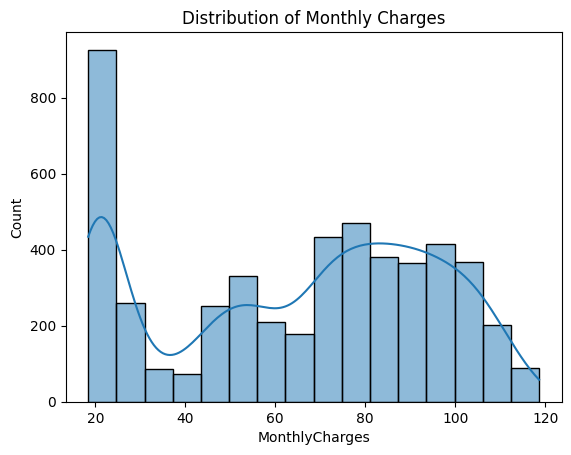

In [132]:
# Create the histogram plot of Monthly charges using seaborn

sns.histplot(data=df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

In [133]:
df['TotalCharges'].describe()

count    5034.000000
mean     2300.954758
std      2268.346401
min        18.800000
25%       417.662500
50%      1401.000000
75%      3860.600000
max      8670.100000
Name: TotalCharges, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Charges')

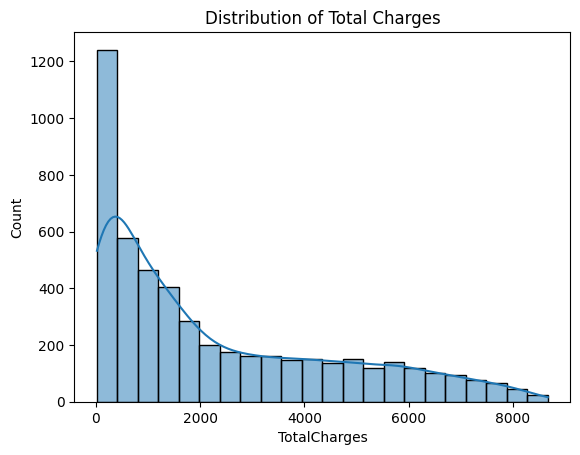

In [134]:
#sns.histplot(data=df['TotalCharges'], kde=True)

# Create the histogram plot using seaborn
sns.histplot(data=df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')

In [135]:
np.histogram(df['TotalCharges'].dropna())

(array([1922,  888,  463,  364,  328,  306,  292,  224,  159,   88],
       dtype=int64),
 array([  18.8 ,  883.93, 1749.06, 2614.19, 3479.32, 4344.45, 5209.58,
        6074.71, 6939.84, 7804.97, 8670.1 ]))

In [146]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
False    4215
True      819
Name: count, dtype: int64

In [144]:
df['gender'].value_counts()

gender
Male      2554
Female    2480
Name: count, dtype: int64

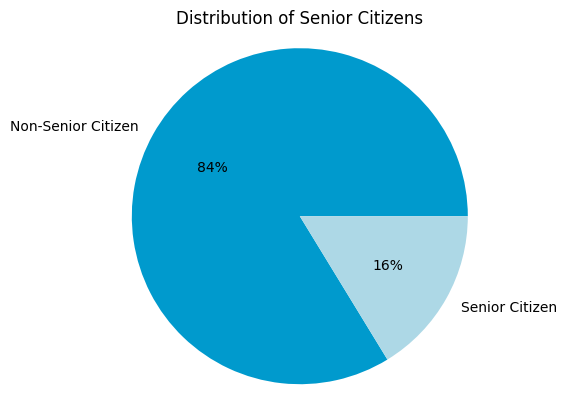

In [149]:
# Count and create pie chart of the 'SeniorCitizen' column

senior_citizen_counts = df['SeniorCitizen'].value_counts()
labels = ['Non-Senior Citizen', 'Senior Citizen']

counts = [senior_citizen_counts[0], senior_citizen_counts[1]]
colors = ['#009ACD', '#ADD8E6']

plt.pie(counts, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False)
plt.axis('equal')

plt.title('Distribution of Senior Citizens')

plt.show()






In [160]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5034 non-null   object 
 1   SeniorCitizen     5034 non-null   bool   
 2   Partner           5034 non-null   bool   
 3   Dependents        5034 non-null   bool   
 4   tenure            5034 non-null   int64  
 5   PhoneService      5034 non-null   bool   
 6   MultipleLines     5034 non-null   bool   
 7   InternetService   5034 non-null   object 
 8   OnlineSecurity    5034 non-null   object 
 9   OnlineBackup      5034 non-null   object 
 10  DeviceProtection  5034 non-null   object 
 11  TechSupport       5034 non-null   object 
 12  StreamingTV       5034 non-null   object 
 13  StreamingMovies   5034 non-null   object 
 14  Contract          5034 non-null   object 
 15  PaperlessBilling  5034 non-null   object 
 16  PaymentMethod     5034 non-null 

In [154]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

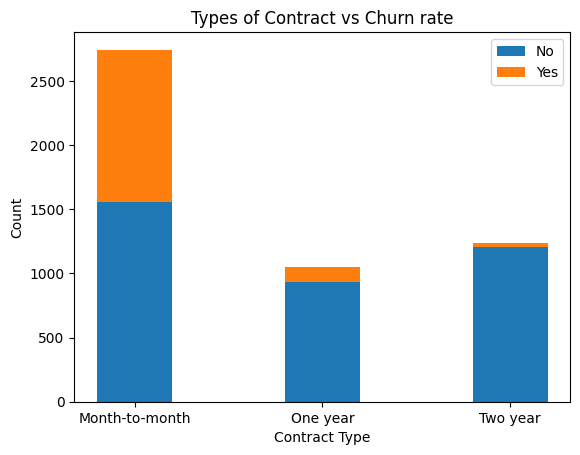

In [160]:
# Grouping and counting occurrences of each combination
grouped_df = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots()

index = range(len(grouped_df))
width = 0.4

bars = []
bottom = [0] * len(grouped_df)

for churn_status in grouped_df.columns:
    bar = ax.bar(index, grouped_df[churn_status], width, bottom=bottom, label=churn_status)
    bars.append(bar)
    bottom = [bottom[i] + grouped_df[churn_status][i] for i in range(len(grouped_df))]

ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')
ax.set_title('Types of Contract vs Churn rate')
ax.set_xticks(index)
ax.set_xticklabels(grouped_df.index)
ax.legend()

plt.show()

In [156]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

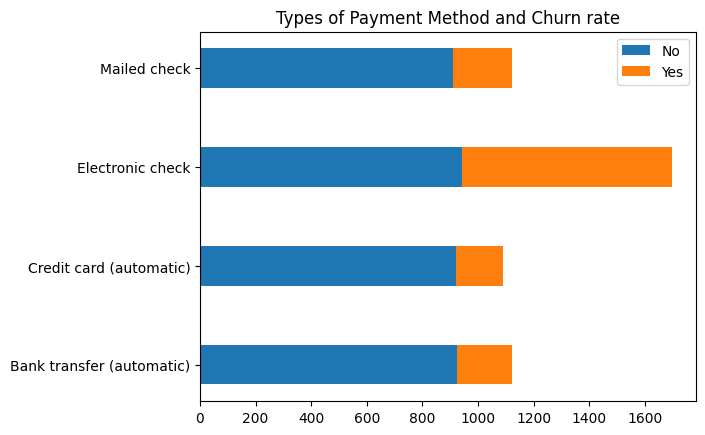

In [167]:
# Grouping and counting occurrences of each combination
grouped_df = df.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

# Plotting the horizontal stacked bar chart
fig, ax = plt.subplots()

index = range(len(grouped_df))
height = 0.4

bars = []
left = [0] * len(grouped_df)

for paymentmethod in grouped_df.columns:
    bar = ax.barh(index, grouped_df[paymentmethod], height, left=left, label=paymentmethod)
    bars.append(bar)
    left = [left[i] + grouped_df[paymentmethod][i] for i in range(len(grouped_df))]

#ax.set_ylabel('Payment Method')
#ax.set_xlabel('Count')
ax.set_title('Types of Payment Method and Churn rate')
ax.set_yticks(index)
ax.set_yticklabels(grouped_df.index)
ax.legend()

plt.show()
